## CS156 Pre-class Work 10.1

`Hopfield Networks`

In [340]:
import numpy as np
import matplotlib.pyplot as plt

In [314]:
class Hopfield:
    
    def __init__(self,num_neurons = 10,num_iters=1000,print_ind=True):
        
        #Number of iterations to run the recall for
        #self.num_iters = num_iters
        self.num_neurons = num_neurons
        self.num_iters = num_iters
        self.print_ind = print_ind
        self.w_mat = np.zeros((self.num_neurons,self.num_neurons))
        self.memories = []
        
    def store_memory(self,pattern):
        
        #Placeholder to track if multiple patterns were inputted
        multiple_patterns = False
        
        if len(pattern) != self.num_neurons:
            if pattern.shape[1] == self.num_neurons:
                multiple_patterns = True
            else:
                raise ValueError(f'Wrong input size! Input should be size {self.num_neurons}')
         
        if multiple_patterns:
            for p in pattern:
                self.memories.append(p)
                
                self.w_mat = self.w_mat + np.outer(p,p)
            
            #Replace diagonal with 0 since it is the square of the weights
            np.fill_diagonal(self.w_mat,0)
            
        else:
        
            #Store the actual pattern
            self.memories.append(pattern)

            #Use the inputted memory to update the weight matrix
            self.w_mat = self.w_mat + np.outer(pattern,pattern)

            #Replace diagonal with 0 since it is the square of the weights
            np.fill_diagonal(self.w_mat,0)

        
    def recall(self,corrupt_pattern):
        
        curr = corrupt_pattern
        iteration = 0
        
        while iteration < self.num_iters:
            
            curr = np.sign(self.w_mat @ curr)
            iteration += 1
            
            if (curr == self.memories).all(1).any():
                if self.print_ind:
                    print("Found pattern:")
                return True,curr
        if self.print_ind:
            print("Did not find pattern. Last update:")
        return False, curr  

In [315]:
memories = np.random.choice([-1,1],size=(3,10))
RNN = Hopfield(num_neurons=memories.shape[1])
RNN.store_memory(memories)

In [322]:
corrupt_pattern = np.random.choice([-1,1],size=10)
RNN.recall(corrupt_pattern)[1]

Found pattern:


array([-1.,  1., -1.,  1., -1., -1.,  1.,  1., -1.,  1.])

In [333]:
def get_hopfield_capacity(size):
    
    num_memories_stored = 0
    num_memories_recalled = 0
    
    accurately_recalled = True
    
    #Initialize an empty Hopfield network
    hopfield = Hopfield(num_neurons = size, print_ind=False)
    
    while accurately_recalled:
        
        #Store random memory
        generated_memory = np.random.choice([-1,1], size=size)
        hopfield.store_memory(generated_memory)
        num_memories_stored += 1
        
        #Corrupt a single bit of the memory and try to recall
        corrupt_memory = generated_memory.copy()
        corrupt_memory[np.random.choice(len(generated_memory))] *= -1
        
        if hopfield.recall(corrupt_memory)[0]:
            num_memories_recalled += 1
        else:
            accurately_recalled = False
        
    return num_memories_stored,num_memories_recalled]
        
        

In [334]:
get_hopfield_capacity(10)

array([4, 3])

In [345]:
network_size = [5,10,15,20,25,50,80,100,200,500,1000]
size_capacities = []

for size in network_size:
    
    avg_list = []
    
    for _ in range(20):
        
        avg_list.append(get_hopfield_capacity(size)[0]-1)
        
    size_capacities.append(np.mean(avg_list))
    
    

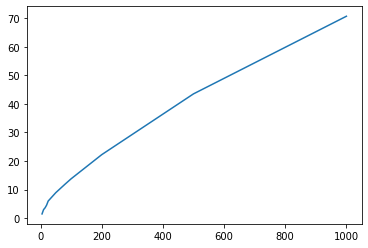

In [346]:
plt.plot(network_size,size_capacities)
plt.show()

Unfortunately, I didn't have time to attempt the last question on asynchronous updates. I spent over 2 hrs trying to figure out the first to questions. And over 3 hours in total.